Let's extract the db into a dataframe

In [1]:
import sqlite3
import pandas as pd


def extract_cells_dataframe(db_path: str, time_step: int) -> pd.DataFrame:
    with sqlite3.connect(db_path) as conn:
        query = """
        SELECT 
            c._index AS cell_index, c.position_x, c.position_y, c.position_z,
            sc.is_stem
        FROM 
            Cells AS c
        LEFT JOIN 
            (SELECT 
                cell_id, MAX(t_change) AS max_t_change
             FROM 
                StemChanges
             WHERE 
                t_change <= ?
             GROUP BY 
                cell_id
            ) AS latest_change ON c._index = latest_change.cell_id
        LEFT JOIN 
            StemChanges AS sc ON latest_change.cell_id = sc.cell_id 
            AND latest_change.max_t_change = sc.t_change
        WHERE 
            c.t_creation <= ?
        """
        return pd.read_sql_query(query, conn, params=(time_step, time_step))


# Define the path to your database and the time step
db_path = "data/culture_pd=0.0_ps=0.8_rng_seed=855503480499.db"  # Replace with your database file path
time_step = 10

# Extract the DataFrame
df_cells = extract_cells_dataframe(db_path, time_step)
df_cells

,cell_index,position_x,position_y,position_z,is_stem
0,0,0.000000,0.000000,0.000000,0
1,1,-0.661177,1.880320,0.165050,0
2,2,1.096779,2.759503,0.534681,1
3,3,0.778782,-1.808316,0.351413,1
4,4,1.099210,0.977364,-1.355174,1
...,...,...,...,...,...
494,457,-10.271517,4.584046,1.583387,0
495,458,-9.025406,7.287896,-1.497568,0
496,459,4.312301,-4.414971,3.414018,0
497,460,-6.938120,6.387188,4.421017,0


In [2]:
df_cells.shape

(499, 5)

In [3]:
df_cells.loc[df_cells["is_stem"] == 1]

,cell_index,position_x,position_y,position_z,is_stem
2,2,1.096779,2.759503,0.534681,1
3,3,0.778782,-1.808316,0.351413,1
4,4,1.099210,0.977364,-1.355174,1
5,5,-2.478339,2.711881,0.084885,1
6,6,2.154417,3.419975,-1.029026,1
...,...,...,...,...,...
485,451,-4.530324,-6.171175,-5.677127,1
487,452,-8.631615,3.917028,-3.983680,1
489,453,-4.228814,-1.370751,-9.954525,1
490,454,-4.035915,7.638760,5.993754,1


In [4]:
df_cells.loc[df_cells["position_x"] < 1.5]

,cell_index,position_x,position_y,position_z,is_stem
0,0,0.000000,0.000000,0.000000,0
1,1,-0.661177,1.880320,0.165050,0
2,2,1.096779,2.759503,0.534681,1
3,3,0.778782,-1.808316,0.351413,1
4,4,1.099210,0.977364,-1.355174,1
...,...,...,...,...,...
493,456,-6.420242,2.344995,-6.726871,1
494,457,-10.271517,4.584046,1.583387,0
495,458,-9.025406,7.287896,-1.497568,0
497,460,-6.938120,6.387188,4.421017,0


En la slice 4 había 301 células, 102 de las cuales son madre. Acá tenemos

In [5]:
df_cells.loc[(df_cells["position_x"] < 1.5) & (df_cells["is_stem"] == 1)]

,cell_index,position_x,position_y,position_z,is_stem
2,2,1.096779,2.759503,0.534681,1
3,3,0.778782,-1.808316,0.351413,1
4,4,1.099210,0.977364,-1.355174,1
5,5,-2.478339,2.711881,0.084885,1
8,8,-0.254961,2.504949,-1.690975,1
...,...,...,...,...,...
485,451,-4.530324,-6.171175,-5.677127,1
487,452,-8.631615,3.917028,-3.983680,1
489,453,-4.228814,-1.370751,-9.954525,1
490,454,-4.035915,7.638760,5.993754,1


In [6]:
df_cells.loc[df_cells["position_y"] > 0.05]

,cell_index,position_x,position_y,position_z,is_stem
1,1,-0.661177,1.880320,0.165050,0
2,2,1.096779,2.759503,0.534681,1
4,4,1.099210,0.977364,-1.355174,1
5,5,-2.478339,2.711881,0.084885,1
6,6,2.154417,3.419975,-1.029026,1
...,...,...,...,...,...
492,456,-6.420242,2.344995,-6.726871,0
493,456,-6.420242,2.344995,-6.726871,1
494,457,-10.271517,4.584046,1.583387,0
495,458,-9.025406,7.287896,-1.497568,0


In [20]:
df_cells.loc[(df_cells["position_y"] > 0.05) & (df_cells["is_stem"] == 1)][
    ["position_x", "position_z", "is_stem"]
].copy()

,position_x,position_z,is_stem
2,1.096779,0.534681,1
4,1.099210,-1.355174,1
5,-2.478339,0.084885,1
6,2.154417,-1.029026,1
8,-0.254961,-1.690975,1
...,...,...,...
478,2.794722,-10.567405,1
481,3.077306,3.634606,1
487,-8.631615,-3.983680,1
490,-4.035915,5.993754,1


Close enough (en el experimento son 102, pero está ma o me). 

In [21]:
df_projected = df_cells.loc[df_cells["position_y"] > 0.05][
    ["position_x", "position_z", "is_stem"]
].copy()
df_projected

,position_x,position_z,is_stem
1,-0.661177,0.165050,0
2,1.096779,0.534681,1
4,1.099210,-1.355174,1
5,-2.478339,0.084885,1
6,2.154417,-1.029026,1
...,...,...,...
492,-6.420242,-6.726871,0
493,-6.420242,-6.726871,1
494,-10.271517,1.583387,0
495,-9.025406,-1.497568,0


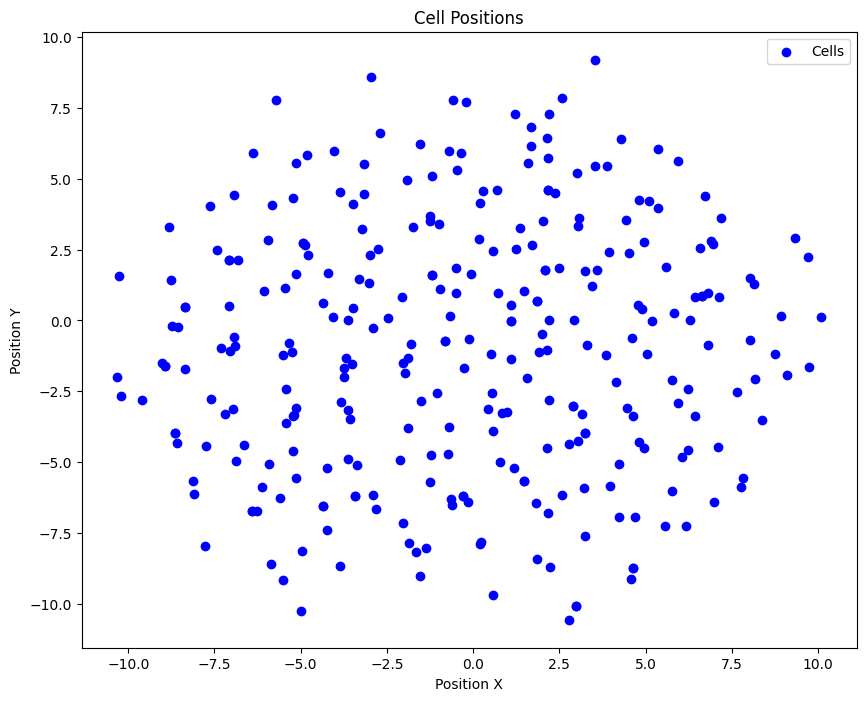

In [22]:
import matplotlib.pyplot as plt

# Extract x and y coordinates
x = df_projected["position_x"]
y = df_projected["position_z"]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the points
ax.scatter(x, y, c="blue", label="Cells")

# Set plot labels and title
ax.set_xlabel("Position X")
ax.set_ylabel("Position Y")
ax.set_title("Cell Positions")

# Show legend
ax.legend()

# Show the plot
plt.show()

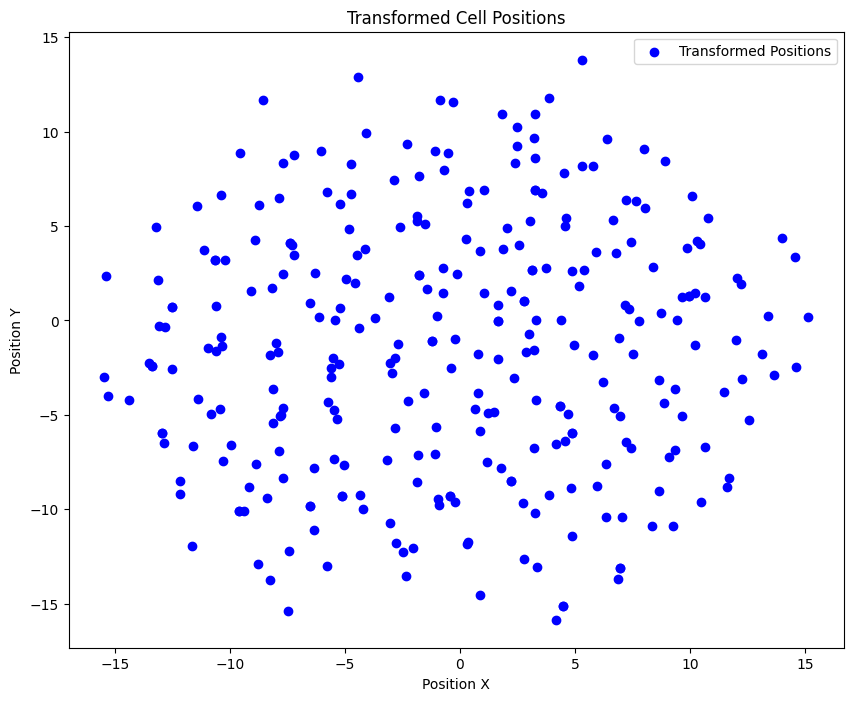

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to polar coordinates
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

# Rescale radial coordinate
scale_factor = 1.5
r_rescaled = r * scale_factor

# Convert back to Cartesian coordinates
x_rescaled = r_rescaled * np.cos(theta)
y_rescaled = r_rescaled * np.sin(theta)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the transformed points
ax.scatter(x_rescaled, y_rescaled, c="blue", label="Transformed Positions")

# Set plot labels and title
ax.set_xlabel("Position X")
ax.set_ylabel("Position Y")
ax.set_title("Transformed Cell Positions")

# Show legend
ax.legend()

# Show the plot
plt.show()

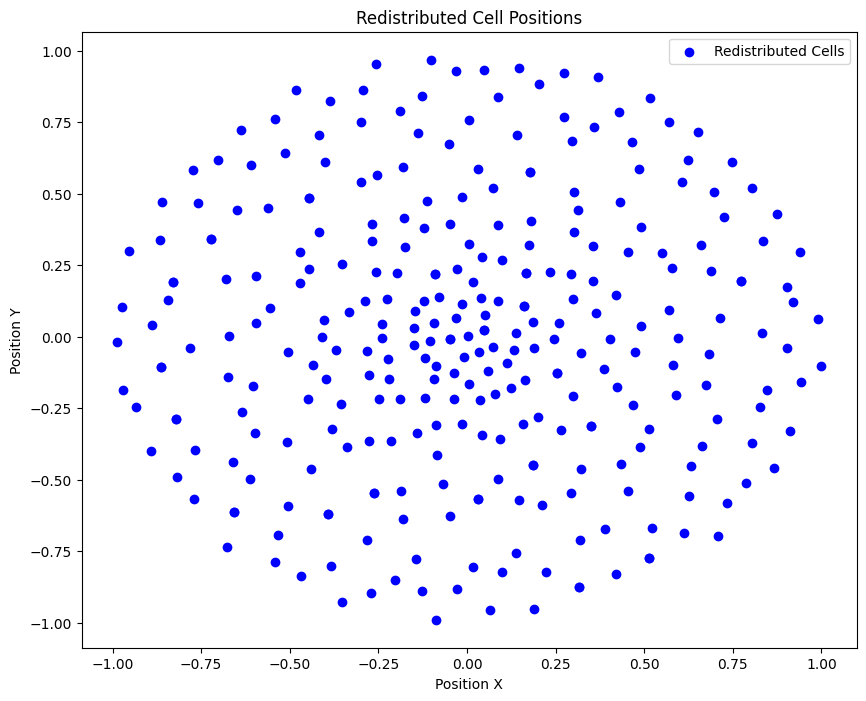

In [24]:
import networkx as nx

# Initialize a graph
G = nx.Graph()

# Add nodes with their original positions
for index, row in df_projected.iterrows():
    G.add_node(index, pos=(row["position_x"], row["position_z"]))

# Applying the spring layout algorithm
pos = nx.spring_layout(G, pos=nx.get_node_attributes(G, "pos"), iterations=100)
# The above line can be uncommented to use the original positions as starting points.

# For a more pronounced effect, you might skip the initial positions:
# pos = nx.spring_layout(G, iterations=50)

# Extract the new positions
x_new = [pos[i][0] for i in G.nodes()]
y_new = [pos[i][1] for i in G.nodes()]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_new, y_new, c="blue", label="Redistributed Cells")
ax.set_xlabel("Position X")
ax.set_ylabel("Position Y")
ax.set_title("Redistributed Cell Positions")
ax.legend()
plt.show()

In [30]:
df_projected["is_stem"].value_counts()

is_stem
0    164
1    137
Name: count, dtype: int64

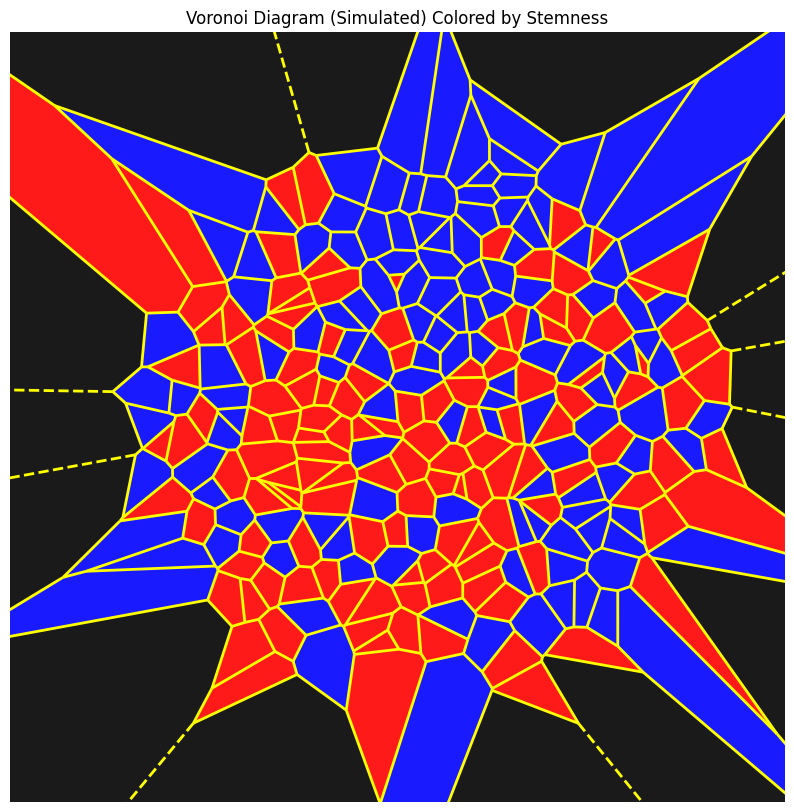

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import skimage.draw

# Extract x and y coordinates
x = df_projected["position_x"].to_numpy()
y = df_projected["position_z"].to_numpy()
is_stem = df_projected["is_stem"].to_numpy()

# Construct Voronoi diagram
points = np.column_stack((x, y))
vor = Voronoi(points)

# Calculate the bounds of the Voronoi diagram
x_min, x_max = np.min(vor.vertices[:, 0]), np.max(vor.vertices[:, 0])
y_min, y_max = np.min(vor.vertices[:, 1]), np.max(vor.vertices[:, 1])

# Tighten the bounds for a closer view
margin = 0.1  # Margin ratio
x_margin = (x_max - x_min) * margin
y_margin = (y_max - y_min) * margin
x_min, x_max = x_min + 4.5 * x_margin, x_max - x_margin
y_min, y_max = y_min + y_margin, y_max - 3.5 * y_margin


# Increase the resolution factor
resolution_factor = 50  # Adjust this for higher resolution

# Adjust overlay size based on the new resolution factor
overlay_size = (
    int((x_max - x_min) * resolution_factor),
    int((y_max - y_min) * resolution_factor),
)

# Create an RGBA image to overlay the Voronoi regions
voronoi_overlay = np.zeros(
    (overlay_size[1], overlay_size[0], 4), dtype=np.uint8
)
voronoi_overlay[..., 3] = 255  # Set alpha to opaque

# Fill the Voronoi regions with color based on 'is_stem'
for point_idx, region_idx in enumerate(vor.point_region):
    region = vor.regions[region_idx]
    if not -1 in region and len(region) > 0:
        polygon = [
            (vor.vertices[i] - [x_min, y_min]) * resolution_factor
            for i in region
        ]  # Scale and translate
        poly_x, poly_y = zip(*polygon)
        poly_y = [overlay_size[1] - y for y in poly_y]  # Flip y-coordinates
        rr, cc = skimage.draw.polygon(
            poly_y, poly_x, voronoi_overlay.shape[:2]
        )
        color = (255, 0, 0, 255) if is_stem[point_idx] else (0, 0, 255, 255)
        voronoi_overlay[rr, cc] = color

# Plot adjustments
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(voronoi_overlay, alpha=0.9, extent=[x_min, x_max, y_min, y_max])
voronoi_plot_2d(
    vor,
    ax=ax,
    show_points=False,
    show_vertices=False,
    line_colors="yellow",
    line_width=2,
)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Voronoi Diagram (Simulated) Colored by Stemness")
plt.axis("off")
plt.show()